In [ ]:
print("Hello world")

Hello world


# Playing around

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
asteroid = pd.read_csv('/content/drive/MyDrive/Asteroid_Updated.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
asteroid.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [ ]:
list(asteroid.columns)

['name',
 'a',
 'e',
 'i',
 'om',
 'w',
 'q',
 'ad',
 'per_y',
 'data_arc',
 'condition_code',
 'n_obs_used',
 'H',
 'neo',
 'pha',
 'diameter',
 'extent',
 'albedo',
 'rot_per',
 'GM',
 'BV',
 'UB',
 'IR',
 'spec_B',
 'spec_T',
 'G',
 'moid',
 'class',
 'n',
 'per',
 'ma']

In [ ]:
asteroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          18 non-null      object 
 17  albedo    

diameter has many missing values. these are not going to be helpful in any way, so let's drop them.

In [ ]:
asteroid = asteroid[asteroid['diameter'].notnull()]

In [ ]:
asteroid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137636 entries, 0 to 810375
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            15124 non-null   object 
 1   a               137636 non-null  float64
 2   e               137636 non-null  float64
 3   i               137636 non-null  float64
 4   om              137636 non-null  float64
 5   w               137636 non-null  float64
 6   q               137636 non-null  float64
 7   ad              137636 non-null  float64
 8   per_y           137636 non-null  float64
 9   data_arc        137498 non-null  float64
 10  condition_code  137636 non-null  object 
 11  n_obs_used      137636 non-null  int64  
 12  H               136889 non-null  float64
 13  neo             137636 non-null  object 
 14  pha             137636 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          16 non-null      object 
 17  albedo    

In [ ]:
asteroid.shape

(137636, 31)

In [ ]:
print(f"There are {asteroid.shape[0]} number of rows in dataset")
print(f"There are {asteroid.shape[1]} number of columns in dataset")

There are 137636 number of rows in dataset
There are 31 number of columns in dataset


In [ ]:
asteroid['extent']

0         964.4 x 964.2 x 891.8
1                   582x556x500
2                           NaN
3         572.6 x 557.2 x 446.4
4                           NaN
                  ...          
797860                      NaN
798077                      NaN
798189                      NaN
799752                      NaN
810375                      NaN
Name: extent, Length: 137636, dtype: object

In [ ]:
asteroid.isna().sum()

name              122512
a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             138
condition_code         0
n_obs_used             0
H                    747
neo                    0
pha                    0
diameter               0
extent            137620
albedo              1230
rot_per           126448
GM                137622
BV                136631
UB                136671
IR                137635
spec_B            136266
spec_T            136671
G                 137517
moid                   0
class                  0
n                      0
per                    0
ma                     0
dtype: int64

In [ ]:
asteroid.shape

(137636, 31)

some features have too many data values as null. let's drop these.

In [ ]:
asteroid = asteroid.drop(['G','extent','rot_per','GM','BV','UB','IR','spec_B','spec_T'], axis=1)

In [ ]:
asteroid.shape

(137636, 22)

we have now removed 9 features with too many missing data

In [ ]:
asteroid.isna().sum()

name              122512
a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             138
condition_code         0
n_obs_used             0
H                    747
neo                    0
pha                    0
diameter               0
albedo              1230
moid                   0
class                  0
n                      0
per                    0
ma                     0
dtype: int64

# More Data cleaning

1. I am dropping the name feature as it does not add any value to the model.
2. Let's then examine the features with null values and find out if they can be filled with the mean, median or anything else

In [ ]:
asteroid = asteroid.drop(['name'], axis=1)

In [ ]:
print("data type of data_arc is" , asteroid['data_arc'].dtype)
print("data type of H is" , asteroid['H'].dtype)
print("data type of albedo is" , asteroid['albedo'].dtype)

data type of data_arc is float64
data type of H is float64
data type of albedo is float64


since all are float values, we can consider filling these NaN values with the mean or median.

let's try using simple imputer

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
impNumeric = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
X=asteroid[['data_arc','H','albedo']]
asteroid[['data_arc','H','albedo']]=impNumeric.fit(X).transform(X)

In [ ]:
asteroid.isna().sum()

a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
neo               0
pha               0
diameter          0
albedo            0
moid              0
class             0
n                 0
per               0
ma                0
dtype: int64

voila, no more null values!

In [ ]:
asteroid['condition_code'].value_counts()

0      126194
9        5643
0        2019
9.0       863
1         808
1         565
2         302
5         241
6         152
4         143
3         135
7         129
2          94
5.0        92
7.0        78
8          49
6.0        36
4.0        33
3          32
8.0        28
Name: condition_code, dtype: int64

In [ ]:
#let's convert some columns to float
asteroid['condition_code']=asteroid['condition_code'].astype(float)
asteroid['n_obs_used']=asteroid['condition_code'].astype(float)
asteroid['diameter']=asteroid['diameter'].astype(float)

In [ ]:
asteroid['condition_code'].value_counts()

0.0    128213
9.0      6506
1.0      1373
2.0       396
5.0       333
7.0       207
6.0       188
4.0       176
3.0       167
8.0        77
Name: condition_code, dtype: int64

In [ ]:
asteroid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137636 entries, 0 to 810375
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               137636 non-null  float64
 1   e               137636 non-null  float64
 2   i               137636 non-null  float64
 3   om              137636 non-null  float64
 4   w               137636 non-null  float64
 5   q               137636 non-null  float64
 6   ad              137636 non-null  float64
 7   per_y           137636 non-null  float64
 8   data_arc        137636 non-null  float64
 9   condition_code  137636 non-null  float64
 10  n_obs_used      137636 non-null  float64
 11  H               137636 non-null  float64
 12  neo             137636 non-null  object 
 13  pha             137636 non-null  object 
 14  diameter        137636 non-null  float64
 15  albedo          137636 non-null  float64
 16  moid            137636 non-null  float64
 17  class     

In [ ]:
asteroid['class'].value_counts()

MBA    126390
OMB      7510
TJN      1874
IMB       588
APO       486
MCA       355
AMO       269
ATE        95
CEN        49
TNO        13
AST         7
Name: class, dtype: int64

In [ ]:
asteroid['neo'].value_counts()

N    136786
Y       850
Name: neo, dtype: int64

In [ ]:
asteroid['pha'].value_counts()

N    137415
Y       221
Name: pha, dtype: int64

using onehotencoder on neo and pha as they are categorical binary features. we cannot use this on class as it has too many possible values, which will cause computational troubles.

In [ ]:
categorical_cols = ['neo','pha']
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
array_hot_encoded = ohe.fit_transform(asteroid[categorical_cols]).toarray()
asteroid_ohe = pd.DataFrame(array_hot_encoded, index=asteroid.index, columns = ['N_neo','Y_neo', 'N_pha','Y_pha'])
asteroid_other_cols = asteroid.drop(columns=categorical_cols)
new_asteroid=pd.concat([asteroid_ohe, asteroid_other_cols], axis = 1)
#another way is in the ANN course project - it is using column transformer

In [ ]:
new_asteroid.head()

,N_neo,Y_neo,N_pha,Y_pha,a,e,i,om,w,q,...,condition_code,n_obs_used,H,diameter,albedo,moid,class,n,per,ma
0,1.0,0.0,1.0,0.0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,...,0.0,0.0,3.34,939.400,0.0900,1.59478,MBA,0.213885,1683.145708,77.372096
1,1.0,0.0,1.0,0.0,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,...,0.0,0.0,4.13,545.000,0.1010,1.23324,MBA,0.213503,1686.155999,59.699133
2,1.0,0.0,1.0,0.0,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,...,0.0,0.0,5.33,246.596,0.2140,1.03454,MBA,0.226019,1592.787285,34.925016
3,1.0,0.0,1.0,0.0,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,...,0.0,0.0,3.20,525.400,0.4228,1.13948,MBA,0.271609,1325.432765,95.861936
4,1.0,0.0,1.0,0.0,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,...,0.0,0.0,6.85,106.699,0.2740,1.09589,MBA,0.238632,1508.600458,282.366289


In [ ]:
print(f"valuecount of N neo is \n{new_asteroid['N_neo'].value_counts()}")
print(f"\nvaluecount of N pha is \n{new_asteroid['N_pha'].value_counts()}")
print(f"\nvaluecount of Y neo is \n{new_asteroid['Y_neo'].value_counts()}")
print(f"\nvaluecount of Y pha is \n{new_asteroid['Y_pha'].value_counts()}")

valuecount of N neo is 
1.0    136786
0.0       850
Name: N_neo, dtype: int64

valuecount of N pha is 
1.0    137415
0.0       221
Name: N_pha, dtype: int64

valuecount of Y neo is 
0.0    136786
1.0       850
Name: Y_neo, dtype: int64

valuecount of Y pha is 
0.0    137415
1.0       221
Name: Y_pha, dtype: int64


successfully onehotencoded the two features

let's draw boxplots of the class feature

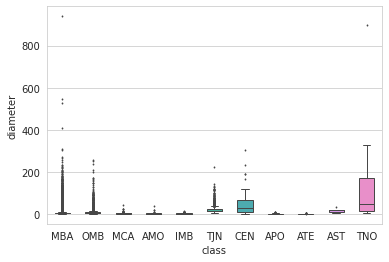

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(x = 'class', y = 'diameter', data = new_asteroid, linewidth=1, width=0.5, fliersize=1)
#use median values to give hierarchy using labelencoder

In [ ]:
corr_matrix = new_asteroid.corr()

In [ ]:
corr_matrix['diameter'].sort_values(ascending=False)

diameter          1.000000
data_arc          0.491580
moid              0.332423
q                 0.329703
a                 0.144736
ad                0.093430
i                 0.052609
per               0.048953
per_y             0.048953
N_neo             0.036163
N_pha             0.019599
ma                0.009659
w                 0.002966
om                0.001164
Y_pha            -0.019599
Y_neo            -0.036163
e                -0.049133
condition_code   -0.073413
n_obs_used       -0.073413
albedo           -0.107334
n                -0.201023
H                -0.568493
Name: diameter, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ee27e01d0>,
      dtype=object)

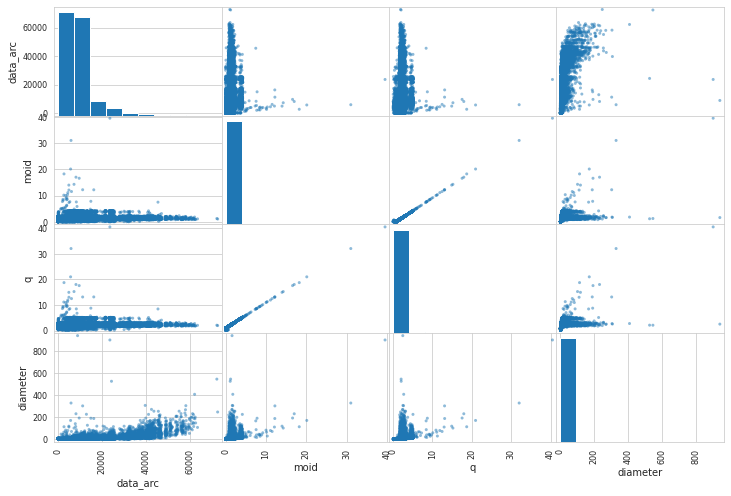

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["data_arc", "moid", "q", "diameter"]
scatter_matrix(new_asteroid[attributes], figsize = (12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eea1e0690>,
      dtype=object)

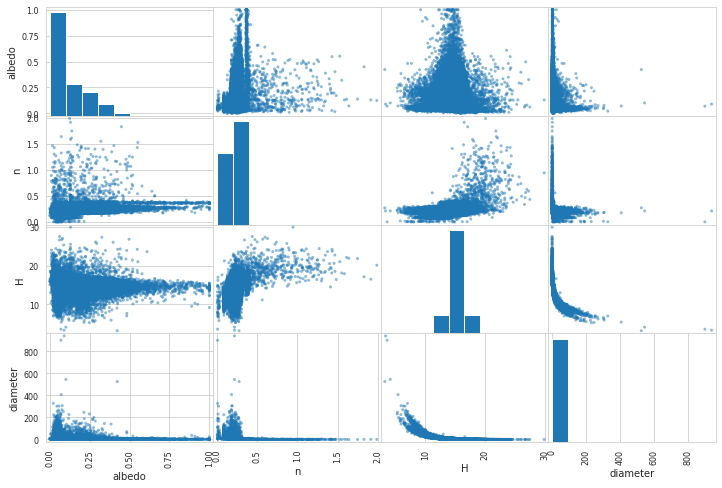

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["albedo", "n", "H", "diameter"]
scatter_matrix(new_asteroid[attributes], figsize = (12,8))

***data arc, moid and 1 are the most positive parameters wrt diameter. albedo, n and H are the exact opposite.***

In [ ]:
new_asteroid.head()

,N_neo,Y_neo,N_pha,Y_pha,a,e,i,om,w,q,...,condition_code,n_obs_used,H,diameter,albedo,moid,class,n,per,ma
0,1.0,0.0,1.0,0.0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,...,0.0,0.0,3.34,939.400,0.0900,1.59478,MBA,0.213885,1683.145708,77.372096
1,1.0,0.0,1.0,0.0,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,...,0.0,0.0,4.13,545.000,0.1010,1.23324,MBA,0.213503,1686.155999,59.699133
2,1.0,0.0,1.0,0.0,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,...,0.0,0.0,5.33,246.596,0.2140,1.03454,MBA,0.226019,1592.787285,34.925016
3,1.0,0.0,1.0,0.0,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,...,0.0,0.0,3.20,525.400,0.4228,1.13948,MBA,0.271609,1325.432765,95.861936
4,1.0,0.0,1.0,0.0,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,...,0.0,0.0,6.85,106.699,0.2740,1.09589,MBA,0.238632,1508.600458,282.366289


# In Depth EDA

### let's go feature wise, let's begin with 'a', the semi major axis of motion of asteroid

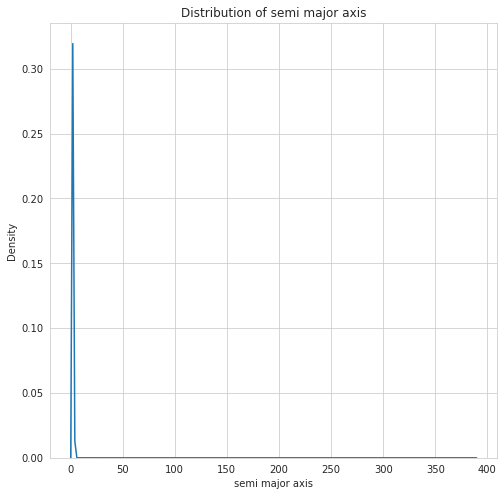

In [ ]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=new_asteroid,x=new_asteroid['a'])
plt.xlabel("semi major axis")
plt.title("Distribution of semi major axis")
plt.show()

Text(0.5, 1.0, 'Boxplot of semi major axis')

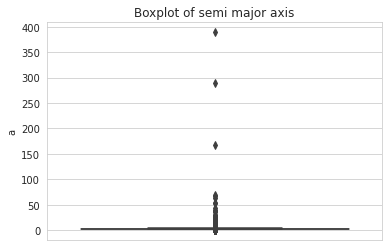

In [ ]:
sns.boxplot(data=new_asteroid,y=new_asteroid['a'])
plt.title("Boxplot of semi major axis")

In [ ]:
new_asteroid['a'].describe()

count    137636.000000
mean          2.814613
std           1.522740
min           0.626226
25%           2.536714
50%           2.750859
75%           3.092537
max         389.145964
Name: a, dtype: float64

In [ ]:
print(f"99 percentile of semi major axis columns is {np.percentile(new_asteroid['a'],99)}")

99 percentile of semi major axis columns is 5.1790581406820655


so we are mostly dealing with a <+ 6, because the 99th percentile is as printed above but the max value is in the 380s. most of the asteroids in the dataset are near earth asteroids.
0.144736 was the correlation matrix score for this parameter.

Text(0.5, 1.0, 'Scatter plt between Diameter of asteroids and Semi major axis')

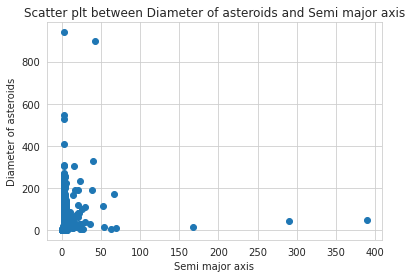

In [ ]:
plt.scatter(new_asteroid['a'],new_asteroid['diameter'])
plt.xlabel("Semi major axis")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plt between Diameter of asteroids and Semi major axis")

### let's look into eccentricity e

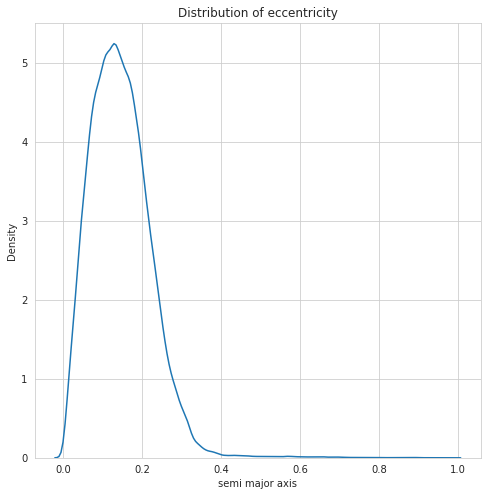

In [ ]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=new_asteroid,x=new_asteroid['e'])
plt.xlabel("semi major axis")
plt.title("Distribution of eccentricity")
plt.show()

Text(0.5, 1.0, 'Boxplot of eccentricity')

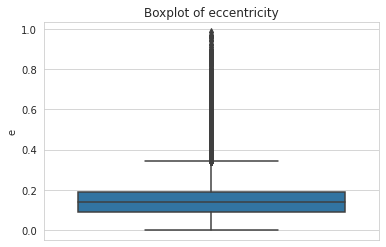

In [ ]:
sns.boxplot(data=new_asteroid,y=new_asteroid['e'])
plt.title("Boxplot of eccentricity")

In [ ]:
new_asteroid['e'].describe()

count    137636.000000
mean          0.145485
std           0.077573
min           0.000489
25%           0.089623
50%           0.138543
75%           0.191141
max           0.984348
Name: e, dtype: float64

In [ ]:
print(f"99 percentile of eccentricity is {np.percentile(new_asteroid['e'],99)}")

99 percentile of eccentricity is 0.34840423530525694


Text(0.5, 1.0, 'Scatter plt between Diameter of asteroids and eccentricity')

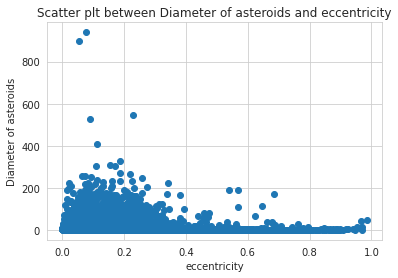

In [ ]:
plt.scatter(new_asteroid['e'],new_asteroid['diameter'])
plt.xlabel("eccentricity")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plt between Diameter of asteroids and eccentricity")

again we have plenty of outliers as the 99th percentile is 0.34 and max is about 0.98. the corelation score for e was -0.049.

### let's go on to i - inclination with respect to x and y axes

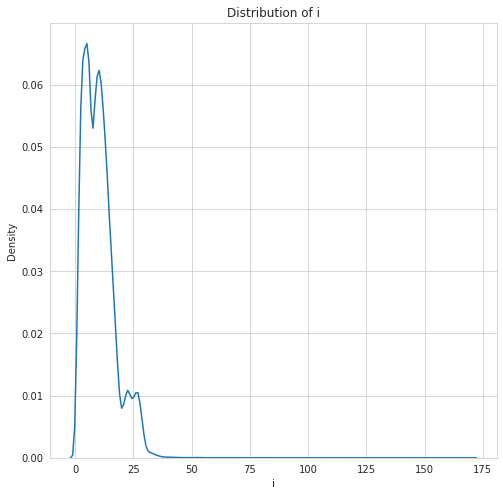

In [ ]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=new_asteroid,x=new_asteroid['i'])
plt.xlabel("i")
plt.title("Distribution of i")
plt.show()

Text(0.5, 1.0, 'Boxplot of i')

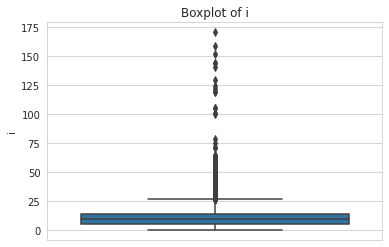

In [ ]:
sns.boxplot(data=new_asteroid,y=new_asteroid['i'])
plt.title("Boxplot of i")

In [ ]:
new_asteroid['i'].describe()

count    137636.000000
mean         10.349182
std           6.835111
min           0.021855
25%           5.120506
50%           9.389963
75%          13.738588
max         170.323647
Name: i, dtype: float64

In [ ]:
print(f"99 percentile of i is {np.percentile(new_asteroid['i'],99)}")

99 percentile of i is 29.002069816760045


Text(0.5, 1.0, 'Scatter plt between Diameter of asteroids and i')

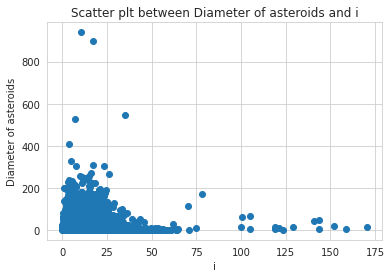

In [ ]:
plt.scatter(new_asteroid['i'],new_asteroid['diameter'])
plt.xlabel("i")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plt between Diameter of asteroids and i")

again we have plenty of outliers as the 99th percentile is 29 and max is about 170. the corelation score for i was 0.052

### om - longitude of ascending node

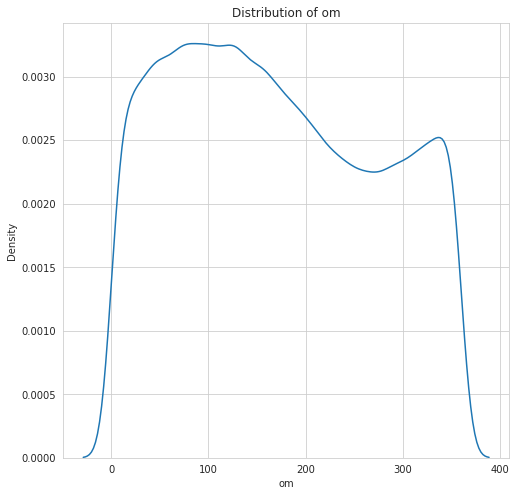

In [ ]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=new_asteroid,x=new_asteroid['om'])
plt.xlabel("om")
plt.title("Distribution of om")
plt.show()

Text(0.5, 1.0, 'Boxplot of om')

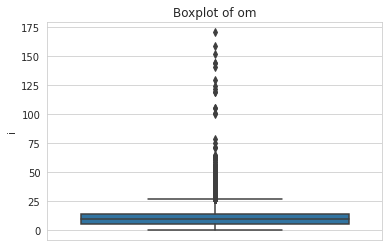

In [ ]:
sns.boxplot(data=new_asteroid,y=new_asteroid['i'])
plt.title("Boxplot of om")

In [ ]:
new_asteroid['om'].describe()

count    137636.000000
mean        169.827629
std         102.713052
min           0.000738
25%          82.334880
50%         160.438430
75%         256.268387
max         359.990858
Name: om, dtype: float64

In [ ]:
print(f"99 percentile of om is {np.percentile(new_asteroid['om'],99)}")

99 percentile of om is 356.4063159846065


Text(0.5, 1.0, 'Scatter plt between Diameter of asteroids and om')

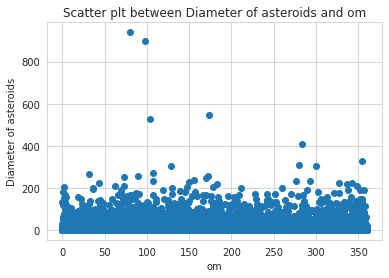

In [ ]:
plt.scatter(new_asteroid['om'],new_asteroid['diameter'])
plt.xlabel("om")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plt between Diameter of asteroids and om")

distribution seems uniform. very little outliers. corelation score of 0.0011

### w - argument of perihelion

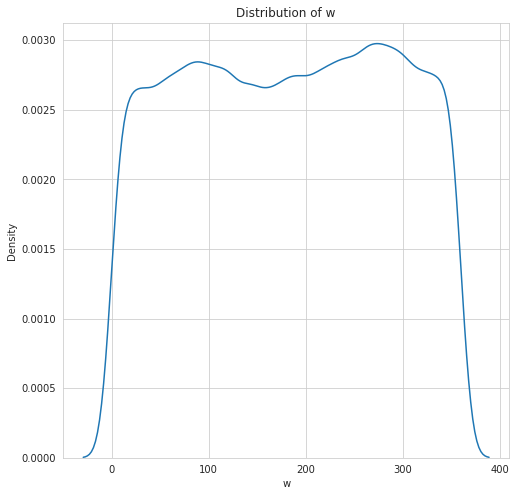

In [ ]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=new_asteroid,x=new_asteroid['w'])
plt.xlabel("w")
plt.title("Distribution of w")
plt.show()

Text(0.5, 1.0, 'Boxplot of w')

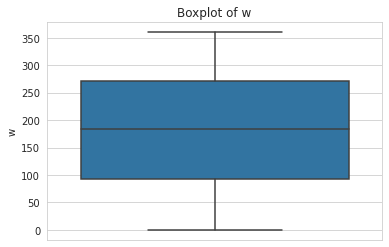

In [ ]:
sns.boxplot(data=new_asteroid,y=new_asteroid['w'])
plt.title("Boxplot of w")

In [ ]:
new_asteroid['w'].describe()

count    137636.000000
mean        181.904551
std         103.556464
min           0.004466
25%          91.947943
50%         183.669900
75%         271.762261
max         359.995174
Name: w, dtype: float64

In [ ]:
print(f"99 percentile of w is {np.percentile(new_asteroid['w'],99)}")

99 percentile of w is 356.24534282802796


Text(0.5, 1.0, 'Scatter plt between Diameter of asteroids and w')

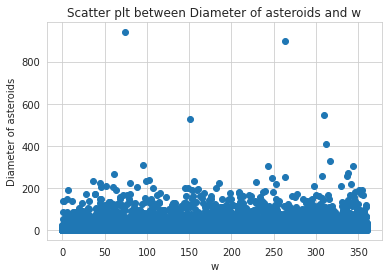

In [ ]:
plt.scatter(new_asteroid['w'],new_asteroid['diameter'])
plt.xlabel("w")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plt between Diameter of asteroids and w")

distribution seems uniform. very little outliers. corelation score of 0.0029

### q - perihelion distance

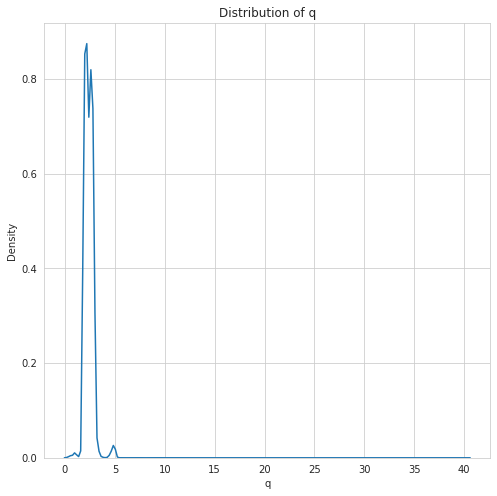

In [ ]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=new_asteroid,x=new_asteroid['q'])
plt.xlabel("q")
plt.title("Distribution of q")
plt.show()

Text(0.5, 1.0, 'Boxplot of q')

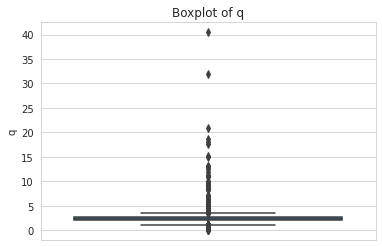

In [ ]:
sns.boxplot(data=new_asteroid,y=new_asteroid['q'])
plt.title("Boxplot of q")

In [ ]:
new_asteroid['q'].describe()

count    137636.000000
mean          2.402609
std           0.516169
min           0.081882
25%           2.068948
50%           2.363897
75%           2.685811
max          40.465671
Name: q, dtype: float64

In [ ]:
print(f"99 percentile of q is {np.percentile(new_asteroid['q'],99)}")

99 percentile of q is 4.719896155379083


Text(0.5, 1.0, 'Scatter plt between Diameter of asteroids and q')

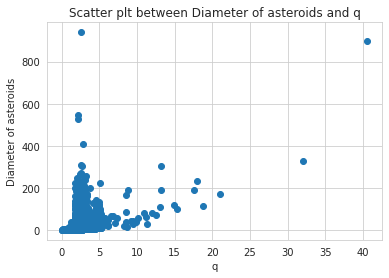

In [ ]:
plt.scatter(new_asteroid['q'],new_asteroid['diameter'])
plt.xlabel("q")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plt between Diameter of asteroids and q")

skewed dataset. 99 percentile is 4.71 but max is 40. corelation score is 0.32 so there's some relation with diameter

### ad - aphelion distance

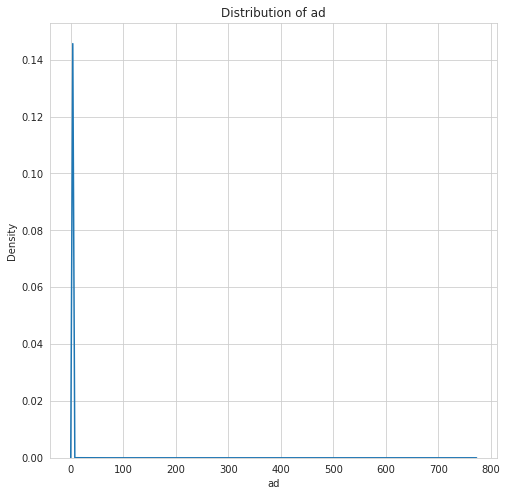

In [ ]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=new_asteroid,x=new_asteroid['ad'])
plt.xlabel("ad")
plt.title("Distribution of ad")
plt.show()

Text(0.5, 1.0, 'Boxplot of ad')

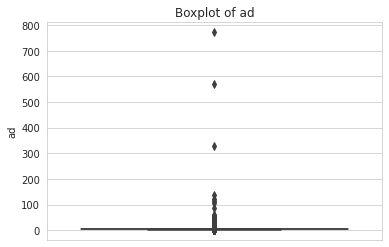

In [ ]:
sns.boxplot(data=new_asteroid,y=new_asteroid['ad'])
plt.title("Boxplot of ad")

In [ ]:
new_asteroid['ad'].describe()

count    137636.000000
mean          3.226618
std           2.896374
min           0.999956
25%           2.864438
50%           3.167516
75%           3.468608
max         772.201080
Name: ad, dtype: float64

In [ ]:
print(f"99 percentile of ad is {np.percentile(new_asteroid['ad'],99)}")

99 percentile of ad is 5.479873510025052


Text(0.5, 1.0, 'Scatter plt between Diameter of asteroids and ad')

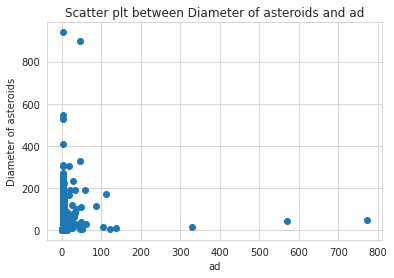

In [ ]:
plt.scatter(new_asteroid['ad'],new_asteroid['diameter'])
plt.xlabel("ad")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plt between Diameter of asteroids and ad")

corr score of 0.09
highly skewed

### per_y - orbital period

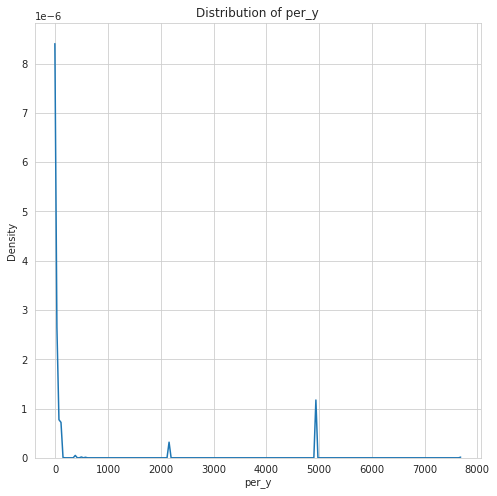

In [ ]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=new_asteroid,x=new_asteroid['per_y'])
plt.xlabel("per_y")
plt.title("Distribution of per_y")
plt.show()

Text(0.5, 1.0, 'per_y')

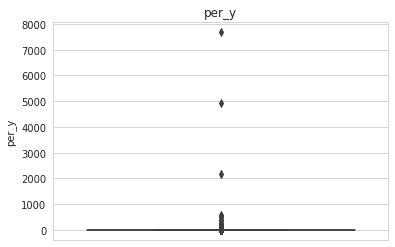

In [ ]:
sns.boxplot(data=new_asteroid,y=new_asteroid['per_y'])
plt.title("per_y")

In [ ]:
new_asteroid['per_y'].describe()

count    137636.000000
mean          4.884248
std          25.532565
min           0.495569
25%           4.040317
50%           4.562581
75%           5.438518
max        7676.742943
Name: per_y, dtype: float64

In [ ]:
print(f"99 percentile of per_y is {np.percentile(new_asteroid['per_y'],99)}")

99 percentile of per_y is 11.78648701253769


Text(0.5, 1.0, 'Scatter plt between Diameter of asteroids and per_y')

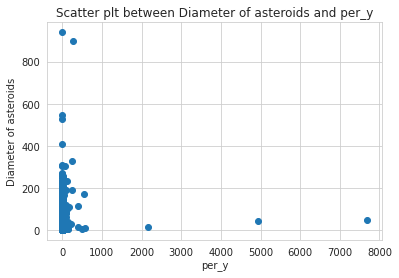

In [ ]:
plt.scatter(new_asteroid['per_y'],new_asteroid['diameter'])
plt.xlabel("per_y")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plt between Diameter of asteroids and per_y")

corr score of 0.0489. highly skewed.

### data_arc - data arc span

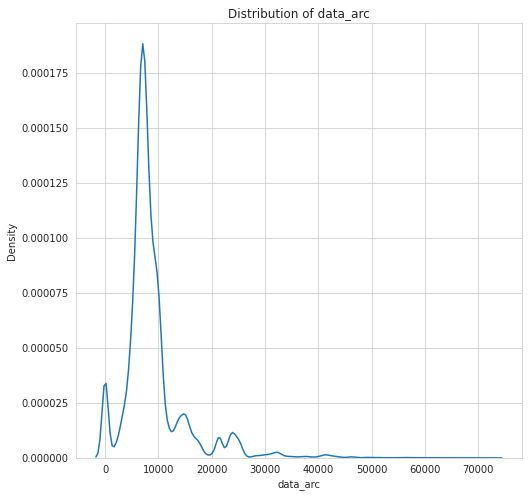

In [ ]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=new_asteroid,x=new_asteroid['data_arc'])
plt.xlabel("data_arc")
plt.title("Distribution of data_arc")
plt.show()

Text(0.5, 1.0, 'data_arc')

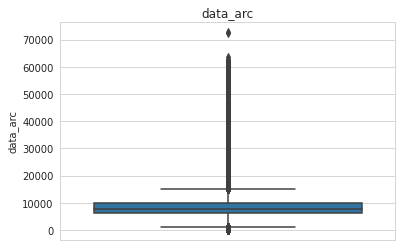

In [ ]:
sns.boxplot(data=new_asteroid,y=new_asteroid['data_arc'])
plt.title("data_arc")

In [ ]:
new_asteroid['data_arc'].describe()

count    137636.000000
mean       8969.818601
std        6162.084652
min           1.000000
25%        6292.000000
50%        7577.000000
75%        9726.000000
max       72684.000000
Name: data_arc, dtype: float64

In [ ]:
print(f"99 percentile of data_arc is {np.percentile(new_asteroid['data_arc'],99)}")

99 percentile of data_arc is 33525.74999999991


Text(0.5, 1.0, 'Scatter plt between Diameter of asteroids and data_arc')

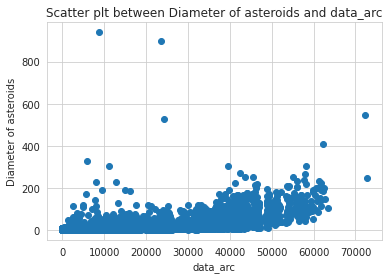

In [ ]:
plt.scatter(new_asteroid['data_arc'],new_asteroid['diameter'])
plt.xlabel("data_arc")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plt between Diameter of asteroids and data_arc")

corr score of 0.49
sort of skewed

### condition_code

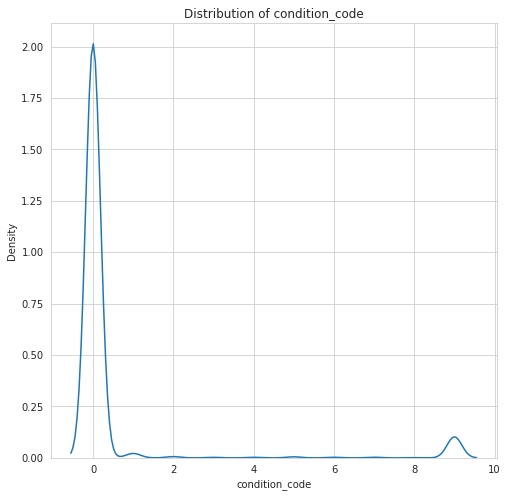

In [ ]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=new_asteroid,x=new_asteroid['condition_code'])
plt.xlabel("condition_code")
plt.title("Distribution of condition_code")
plt.show()

Text(0.5, 1.0, 'condition_code')

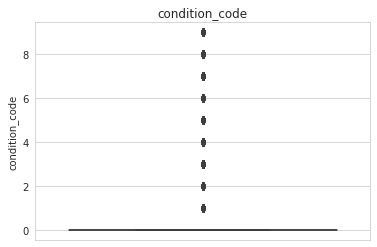

In [ ]:
sns.boxplot(data=new_asteroid,y=new_asteroid['condition_code'])
plt.title("condition_code")

In [ ]:
new_asteroid['condition_code'].describe()

count    137636.000000
mean          0.485207
std           1.966078
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: condition_code, dtype: float64

seeing lots of 0's

In [ ]:
new_asteroid['condition_code'].value_counts()

0.0    128213
9.0      6506
1.0      1373
2.0       396
5.0       333
7.0       207
6.0       188
4.0       176
3.0       167
8.0        77
Name: condition_code, dtype: int64

so there are plenty of well defined orbits. corr score of -0.07


Text(0.5, 1.0, 'Scatter plt between Diameter of asteroids and condition_code')

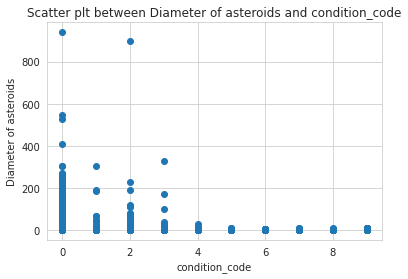

In [ ]:
plt.scatter(new_asteroid['condition_code'],new_asteroid['diameter'])
plt.xlabel("condition_code")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plt between Diameter of asteroids and condition_code")

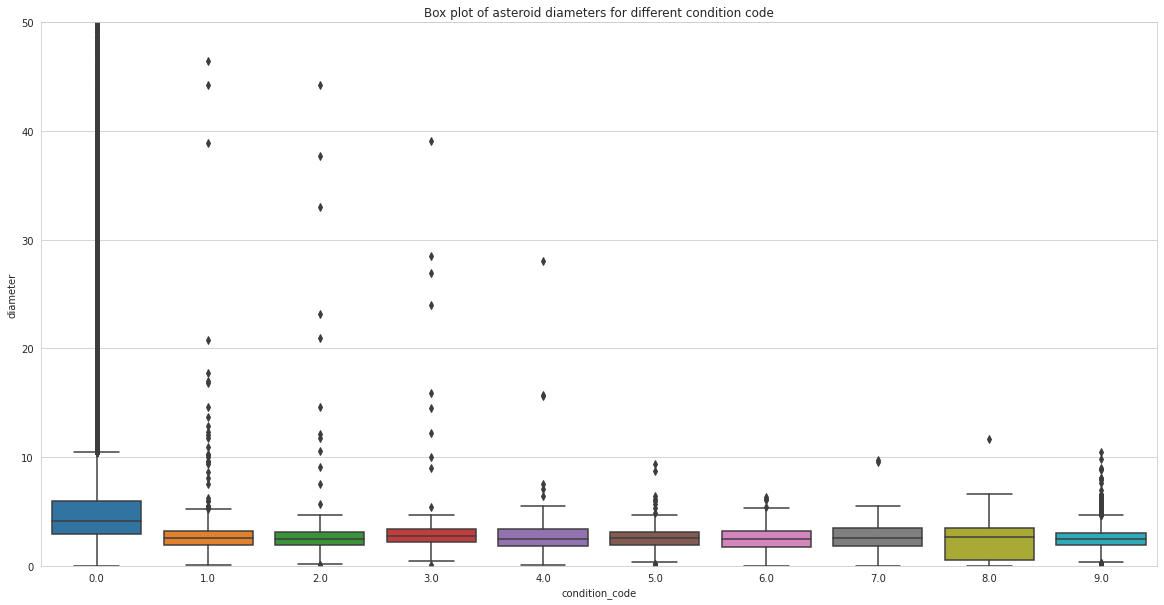

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=new_asteroid,x='condition_code',y='diameter')
plt.ylim((0,50))
plt.title("Box plot of asteroid diameters for different condition code")
plt.show()

# n_obs_used

In [ ]:
new_asteroid.head()

,N_neo,Y_neo,N_pha,Y_pha,a,e,i,om,w,q,...,condition_code,n_obs_used,H,diameter,albedo,moid,class,n,per,ma
0,1.0,0.0,1.0,0.0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,...,0.0,0.0,3.34,939.400,0.0900,1.59478,MBA,0.213885,1683.145708,77.372096
1,1.0,0.0,1.0,0.0,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,...,0.0,0.0,4.13,545.000,0.1010,1.23324,MBA,0.213503,1686.155999,59.699133
2,1.0,0.0,1.0,0.0,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,...,0.0,0.0,5.33,246.596,0.2140,1.03454,MBA,0.226019,1592.787285,34.925016
3,1.0,0.0,1.0,0.0,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,...,0.0,0.0,3.20,525.400,0.4228,1.13948,MBA,0.271609,1325.432765,95.861936
4,1.0,0.0,1.0,0.0,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,...,0.0,0.0,6.85,106.699,0.2740,1.09589,MBA,0.238632,1508.600458,282.366289


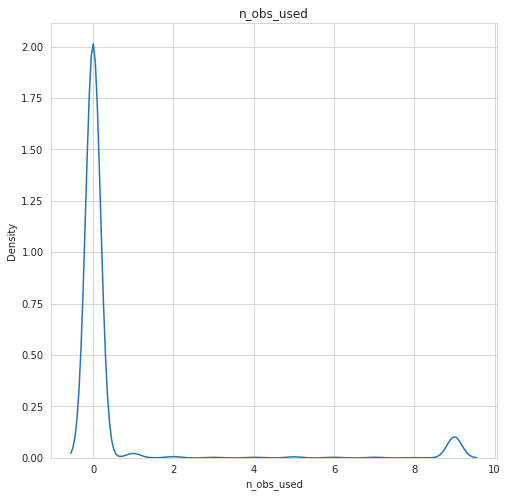

In [ ]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=new_asteroid,x=new_asteroid['n_obs_used'])
plt.xlabel("n_obs_used")
plt.title("n_obs_used")
plt.show()

Text(0.5, 1.0, 'n_obs_used')

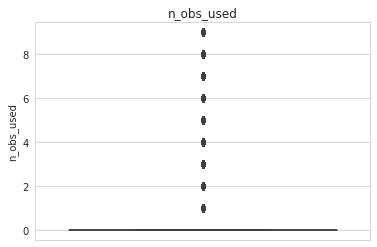

In [ ]:
sns.boxplot(data=new_asteroid,y=new_asteroid['n_obs_used'])
plt.title("n_obs_used")

In [ ]:
new_asteroid['n_obs_used'].describe()

count    137636.000000
mean          0.485207
std           1.966078
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: n_obs_used, dtype: float64

In [ ]:
new_asteroid['n_obs_used'].value_counts()

0.0    128213
9.0      6506
1.0      1373
2.0       396
5.0       333
7.0       207
6.0       188
4.0       176
3.0       167
8.0        77
Name: n_obs_used, dtype: int64

Text(0.5, 1.0, 'Scatter plt between Diameter of asteroids and n_obs_used')

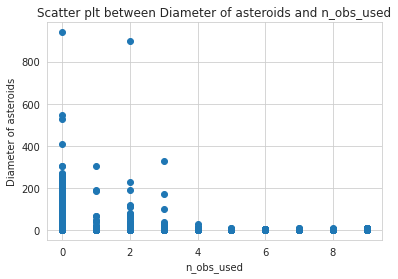

In [ ]:
plt.scatter(new_asteroid['n_obs_used'],new_asteroid['diameter'])
plt.xlabel("n_obs_used")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plt between Diameter of asteroids and n_obs_used")

# H

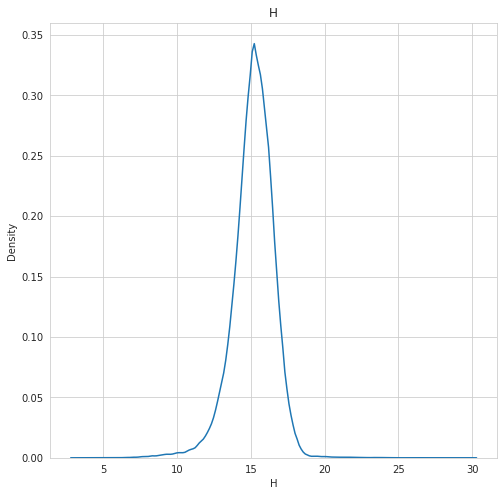

In [ ]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=new_asteroid,x=new_asteroid['H'])
plt.xlabel("H")
plt.title("H")
plt.show()

Text(0.5, 1.0, 'H')

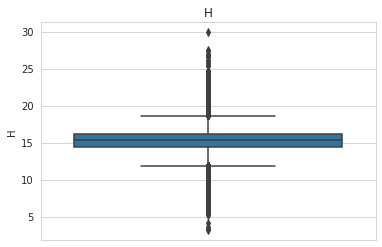

In [ ]:
sns.boxplot(data=new_asteroid,y=new_asteroid['H'])
plt.title("H")

In [ ]:
new_asteroid['H'].describe()

count    137636.000000
mean         15.177041
std           1.403829
min           3.200000
25%          14.400000
50%          15.300000
75%          16.100000
max          29.900000
Name: H, dtype: float64

In [ ]:
print(f"99 percentile of H is {np.percentile(new_asteroid['H'],99)}")

99 percentile of H is 18.0


Text(0.5, 1.0, 'Scatter plt between Diameter of asteroids and H')

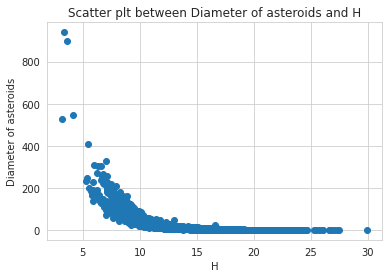

In [ ]:
plt.scatter(new_asteroid['H'],new_asteroid['diameter'])
plt.xlabel("H")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plt between Diameter of asteroids and H")

### somewhat of a relation is seen through this graph.

# Albedo

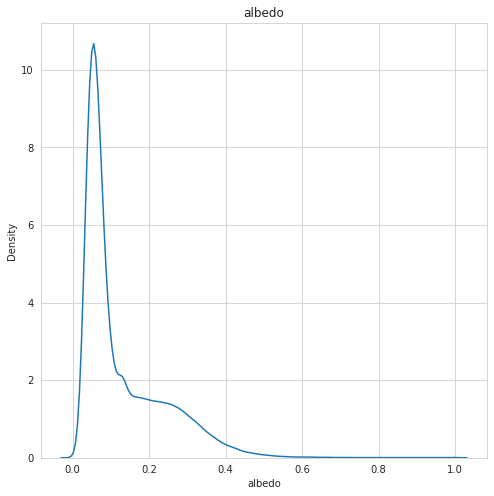

In [ ]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=new_asteroid,x=new_asteroid['albedo'])
plt.xlabel("albedo")
plt.title("albedo")
plt.show()

Text(0.5, 1.0, 'albedo')

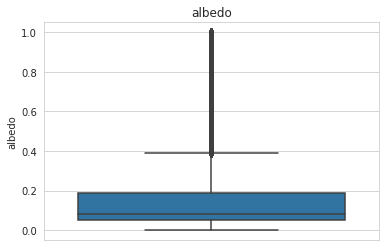

In [ ]:
sns.boxplot(data=new_asteroid,y=new_asteroid['albedo'])
plt.title("albedo")

In [ ]:
new_asteroid['albedo'].describe()

count    137636.000000
mean          0.130066
std           0.109501
min           0.001000
25%           0.053000
50%           0.079000
75%           0.187000
max           1.000000
Name: albedo, dtype: float64

Text(0.5, 1.0, 'Scatter plt between Diameter of asteroids and albedo')

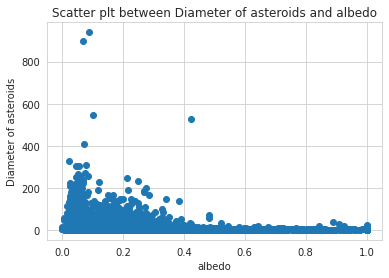

In [ ]:
plt.scatter(new_asteroid['albedo'],new_asteroid['diameter'])
plt.xlabel("albedo")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plt between Diameter of asteroids and albedo")

# moid

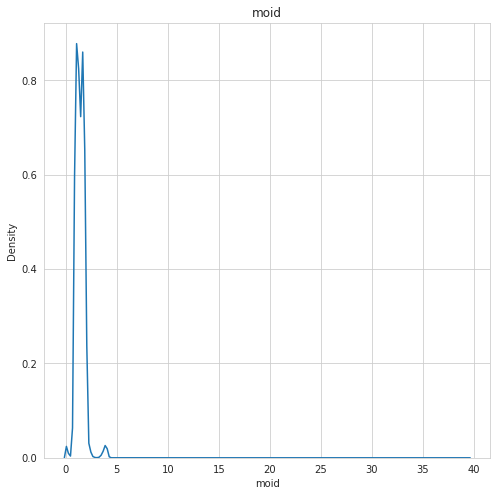

In [ ]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=new_asteroid,x=new_asteroid['moid'])
plt.xlabel("moid")
plt.title("moid")
plt.show()

Text(0.5, 1.0, 'moid')

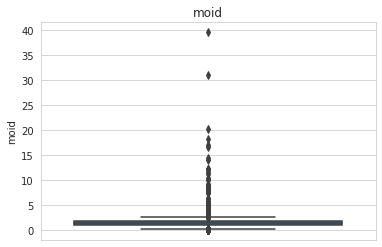

In [ ]:
sns.boxplot(data=new_asteroid,y=new_asteroid['moid'])
plt.title("moid")

In [ ]:
new_asteroid['moid'].describe()

count    137636.000000
mean          1.420145
std           0.512241
min           0.000166
25%           1.082523
50%           1.384935
75%           1.699385
max          39.507000
Name: moid, dtype: float64

Text(0.5, 1.0, 'Scatter plt between Diameter of asteroids and moid')

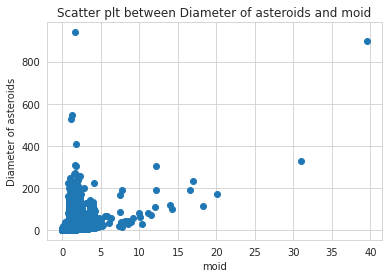

In [ ]:
plt.scatter(new_asteroid['moid'],new_asteroid['diameter'])
plt.xlabel("moid")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plt between Diameter of asteroids and moid")

# n

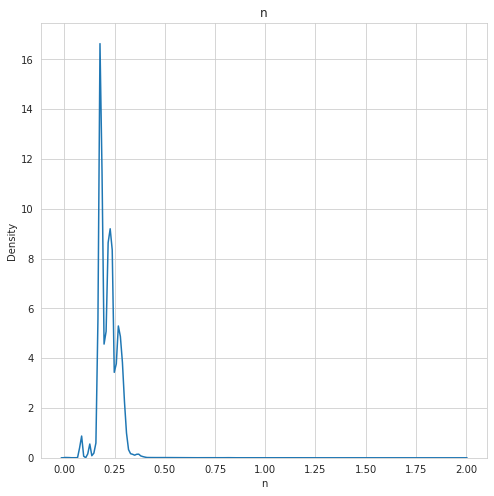

In [ ]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=new_asteroid,x=new_asteroid['n'])
plt.xlabel("n")
plt.title("n")
plt.show()

Text(0.5, 1.0, 'n')

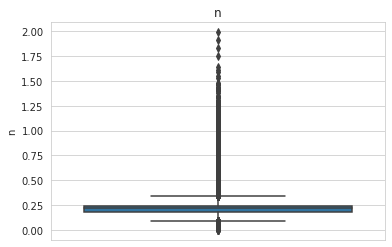

In [ ]:
sns.boxplot(data=new_asteroid,y=new_asteroid['n'])
plt.title("n")

In [ ]:
new_asteroid['n'].describe()

count    137636.000000
mean          0.219640
std           0.056980
min           0.000128
25%           0.181231
50%           0.216024
75%           0.243948
max           1.988877
Name: n, dtype: float64

Text(0.5, 1.0, 'Scatter plt between Diameter of asteroids and n')

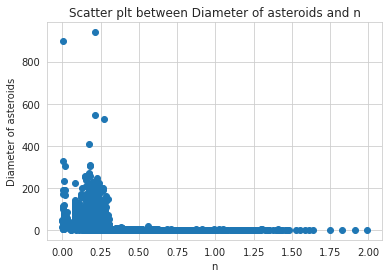

In [ ]:
plt.scatter(new_asteroid['n'],new_asteroid['diameter'])
plt.xlabel("n")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plt between Diameter of asteroids and n")

# per

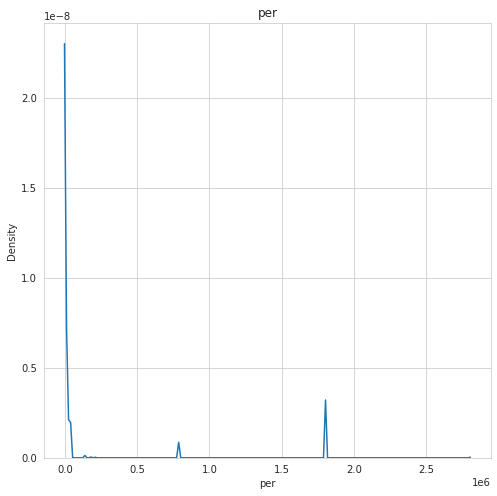

In [ ]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=new_asteroid,x=new_asteroid['per'])
plt.xlabel("per")
plt.title("per")
plt.show()

Text(0.5, 1.0, 'per')

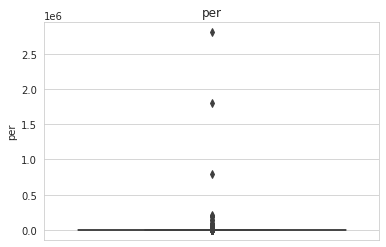

In [ ]:
sns.boxplot(data=new_asteroid,y=new_asteroid['per'])
plt.title("per")

In [ ]:
new_asteroid['per'].describe()

count    1.376360e+05
mean     1.783972e+03
std      9.325769e+03
min      1.810067e+02
25%      1.475726e+03
50%      1.666483e+03
75%      1.986419e+03
max      2.803930e+06
Name: per, dtype: float64

Text(0.5, 1.0, 'Scatter plt between Diameter of asteroids and per')

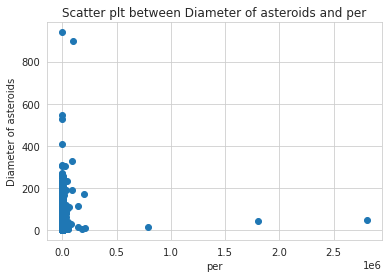

In [ ]:
plt.scatter(new_asteroid['per'],new_asteroid['diameter'])
plt.xlabel("per")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plt between Diameter of asteroids and per")

# ma

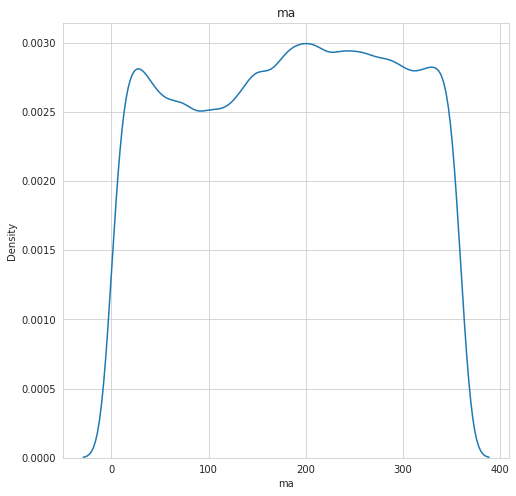

In [ ]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=new_asteroid,x=new_asteroid['ma'])
plt.xlabel("ma")
plt.title("ma")
plt.show()

Text(0.5, 1.0, 'ma')

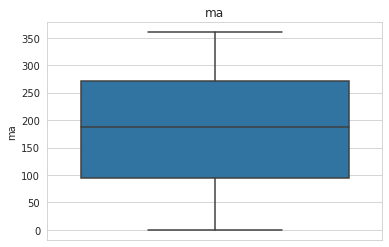

In [ ]:
sns.boxplot(data=new_asteroid,y=new_asteroid['ma'])
plt.title("ma")

damn

In [ ]:
new_asteroid['ma'].describe()

count    137636.000000
mean        183.116785
std         103.411497
min           0.000517
25%          94.301261
50%         186.826667
75%         271.468299
max         359.999979
Name: ma, dtype: float64

Text(0.5, 1.0, 'Scatter plt between Diameter of asteroids and ma')

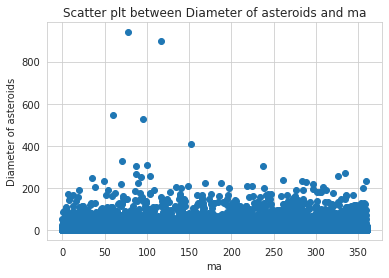

In [ ]:
plt.scatter(new_asteroid['ma'],new_asteroid['diameter'])
plt.xlabel("ma")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plt between Diameter of asteroids and ma")

let's find spearman coefficient for each parameter and store it in a dictionary

In [ ]:
from scipy.stats import spearmanr
spearman_dictionary = {}
coef, p = spearmanr(new_asteroid['a'], new_asteroid['diameter'])
spearman_dictionary['a']=coef
coef, p = spearmanr(new_asteroid['e'], new_asteroid['diameter'])
spearman_dictionary['e']=coef
coef, p = spearmanr(new_asteroid['i'], new_asteroid['diameter'])
spearman_dictionary['i']=coef
coef, p = spearmanr(new_asteroid['om'], new_asteroid['diameter'])
spearman_dictionary['om']=coef
coef, p = spearmanr(new_asteroid['w'], new_asteroid['diameter'])
spearman_dictionary['w']=coef
coef, p = spearmanr(new_asteroid['q'], new_asteroid['diameter'])
spearman_dictionary['q']=coef
coef, p = spearmanr(new_asteroid['ad'], new_asteroid['diameter'])
spearman_dictionary['ad']=coef
coef, p = spearmanr(new_asteroid['per_y'], new_asteroid['diameter'])
spearman_dictionary['per_y']=coef
coef, p = spearmanr(new_asteroid['data_arc'], new_asteroid['diameter'])
spearman_dictionary['data_arc']=coef
coef, p = spearmanr(new_asteroid['condition_code'], new_asteroid['diameter'])
spearman_dictionary['condition_code']=coef
coef, p = spearmanr(new_asteroid['n_obs_used'], new_asteroid['diameter'])
spearman_dictionary['n_obs_used']=coef
coef, p = spearmanr(new_asteroid['H'], new_asteroid['diameter'])
spearman_dictionary['H']=coef
coef, p = spearmanr(new_asteroid['Y_neo'], new_asteroid['diameter'])
spearman_dictionary['Y_neo']=coef
coef, p = spearmanr(new_asteroid['Y_pha'], new_asteroid['diameter'])
spearman_dictionary['Y_pha']=coef
coef, p = spearmanr(new_asteroid['albedo'], new_asteroid['diameter'])
spearman_dictionary['albedo']=coef
coef, p = spearmanr(new_asteroid['moid'], new_asteroid['diameter'])
spearman_dictionary['moid']=coef
coef, p = spearmanr(new_asteroid['n'], new_asteroid['diameter'])
spearman_dictionary['n']=coef
coef, p = spearmanr(new_asteroid['ma'], new_asteroid['diameter'])
spearman_dictionary['ma']=coef
sorted_value_index = np.argsort(spearman_dictionary.values())
dictionary_keys = list(spearman_dictionary.keys())
sorted_spearman_dictionary = {dictionary_keys[i]: sorted(
    spearman_dictionary.values())[i] for i in range(len(dictionary_keys))}

In [ ]:
for k,v in sorted_spearman_dictionary.items():
  print(k,v,"\n")

a -0.7410625781364608 

e -0.5701489865858509 

i -0.27248445218457995 

om -0.25859600806279387 

w -0.25859600806279387 

q -0.14813765496168466 

ad -0.11949013923808038 

per_y -0.06409588471544733 

data_arc 0.0014940115733321705 

condition_code 0.005160507891247732 

n_obs_used 0.03229989195106305 

H 0.132370681553146 

Y_neo 0.373401094748124 

Y_pha 0.48296879972181944 

albedo 0.5246860997056233 

moid 0.5292709954026358 

n 0.5701489865858509 

ma 0.5701489865858509 



have found spearman coefficient. need to do feature engineering.

In [ ]:
new_asteroid['class'].value_counts()

MBA    126390
OMB      7510
TJN      1874
IMB       588
APO       486
MCA       355
AMO       269
ATE        95
CEN        49
TNO        13
AST         7
Name: class, dtype: int64

class is based on location of asteroid. let's label encode it accordingly. here's the info i've used to label encode it. 
number units are in au. class is closely related to q and a, according to the article in https://pdssbn.astro.umd.edu/data_other/objclass.shtml

let's relate it to a for now, as distance of orbit from earth could directly determine if it crashes into it..

1. MBA - main belt asteroid 
   q>1.666, 2.0 AU < a < 3.2 AU
2. OMB - outer main belt asteroid (no q   relation found) 3.2 AU < a < 4.6 AU
3. TJN - Jupiter Trojan 
   4.6 AU < a < 5.5 AU; e < 0.3
4. IMB - Inner Main-belt Asteroid
   a < 2.0 AU; q > 1.666 AU
5. APO - Near-Earth asteroid orbits which cross the Earth's orbit similar to that of 1862 Apollo. a > 1.0 AU; q < 1.017 AU
6. MCA - Mars-crossing Asteroid
   1.3 AU < q < 1.666 AU; a < 3.2 AU
7. AMO - Near-Earth asteroid orbits similar to that of 1221 Amor (a > 1.0 AU; 1.017 AU < q < 1.3 AU)
8. ATE - Near-Earth asteroid orbits similar to that of 2062 Aten (a < 1.0 AU; Q > 0.983 AU
9. Objects with orbits between Jupiter and Neptune (5.5 AU < a < 30.1 AU)
10. TNO - TransNeptunian Object - Objects with orbits outside Neptune (a > 30.1 AU)
11. AST - Asteroid orbit not matching any defined orbit class

i will label encode this with respect to a, as the further away from earth, the lesser threat it poses. 

ATE - 10; APO-9; TNO-1; AST-max value count's value-6; CEN-2; TJN-3; OMB-4; MCA-5; MBA-6; AMO-8; IMB-7
   
   

In [ ]:
p=new_asteroid['class'].map({'ATE':10.0, 'APO':9.0, 'TNO':1.0, 'AST':6.0, 'CEN':2.0, 'TJN':3.0, 'OMB':4.0, 'MCA':5.0, 'MBA':6.0, 'AMO':8.0, 'IMB':7.0})

In [ ]:
p

0         6.0
1         6.0
2         6.0
3         6.0
4         6.0
         ... 
797860    6.0
798077    6.0
798189    6.0
799752    6.0
810375    6.0
Name: class, Length: 137636, dtype: float64

label encoding done

In [ ]:
new_asteroid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137636 entries, 0 to 810375
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   N_neo           137636 non-null  float64
 1   Y_neo           137636 non-null  float64
 2   N_pha           137636 non-null  float64
 3   Y_pha           137636 non-null  float64
 4   a               137636 non-null  float64
 5   e               137636 non-null  float64
 6   i               137636 non-null  float64
 7   om              137636 non-null  float64
 8   w               137636 non-null  float64
 9   q               137636 non-null  float64
 10  ad              137636 non-null  float64
 11  per_y           137636 non-null  float64
 12  data_arc        137636 non-null  float64
 13  condition_code  137636 non-null  float64
 14  n_obs_used      137636 non-null  float64
 15  H               137636 non-null  float64
 16  diameter        137636 non-null  float64
 17  albedo    

In [ ]:
new_asteroid['p']=p

p is the new class indicator column
let's drop class after storing it somewhere

In [ ]:
p_copy = new_asteroid['class']

In [ ]:
new_asteroid = new_asteroid.drop(['class'], axis=1)

now let's do slight EDA for p

In [ ]:
new_asteroid.head()

,N_neo,Y_neo,N_pha,Y_pha,a,e,i,om,w,q,...,condition_code,n_obs_used,H,diameter,albedo,moid,n,per,ma,p
0,1.0,0.0,1.0,0.0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,...,0.0,0.0,3.34,939.400,0.0900,1.59478,0.213885,1683.145708,77.372096,6.0
1,1.0,0.0,1.0,0.0,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,...,0.0,0.0,4.13,545.000,0.1010,1.23324,0.213503,1686.155999,59.699133,6.0
2,1.0,0.0,1.0,0.0,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,...,0.0,0.0,5.33,246.596,0.2140,1.03454,0.226019,1592.787285,34.925016,6.0
3,1.0,0.0,1.0,0.0,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,...,0.0,0.0,3.20,525.400,0.4228,1.13948,0.271609,1325.432765,95.861936,6.0
4,1.0,0.0,1.0,0.0,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,...,0.0,0.0,6.85,106.699,0.2740,1.09589,0.238632,1508.600458,282.366289,6.0


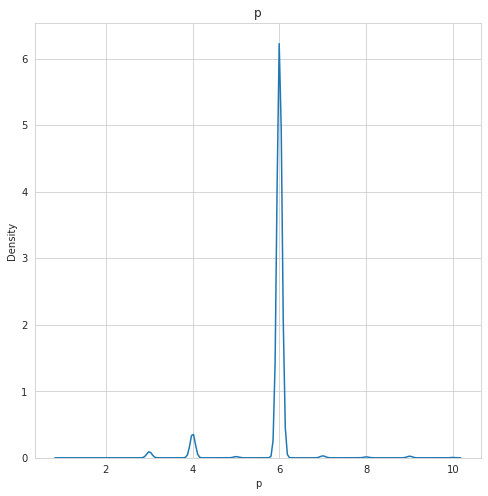

In [ ]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=new_asteroid,x=new_asteroid['p'])
plt.xlabel("p")
plt.title("p")
plt.show()

Text(0.5, 1.0, 'p')

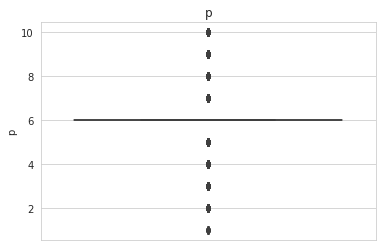

In [ ]:
sns.boxplot(data=new_asteroid,y=new_asteroid['p'])
plt.title("p")

Text(0.5, 1.0, 'Scatter plt between Diameter of asteroids and p')

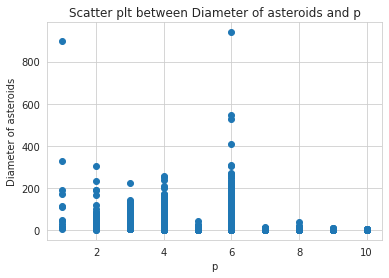

In [ ]:
plt.scatter(new_asteroid['p'],new_asteroid['diameter'])
plt.xlabel("p")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plt between Diameter of asteroids and p")

In [ ]:
coef, p = spearmanr(new_asteroid['p'], new_asteroid['diameter'])
spearman_dictionary['p']=coef
sorted_value_index = np.argsort(spearman_dictionary.values())
dictionary_keys = list(spearman_dictionary.keys())
sorted_spearman_dictionary = {dictionary_keys[i]: sorted(
    spearman_dictionary.values())[i] for i in range(len(dictionary_keys))}

In [ ]:
for k,v in sorted_spearman_dictionary.items():
  print(k,v,"\n")

a -0.7410625781364608 

e -0.5701489865858509 

i -0.29586570229630244 

om -0.27248445218457995 

w -0.25859600806279387 

q -0.25859600806279387 

ad -0.14813765496168466 

per_y -0.11949013923808038 

data_arc -0.06409588471544733 

condition_code 0.0014940115733321705 

n_obs_used 0.005160507891247732 

H 0.03229989195106305 

Y_neo 0.132370681553146 

Y_pha 0.373401094748124 

albedo 0.48296879972181944 

moid 0.5246860997056233 

n 0.5292709954026358 

ma 0.5701489865858509 

p 0.5701489865858509 



p seems to be strongly positively related to diameter! let's find corelation matrix

In [ ]:
corr_matrix = new_asteroid.corr()
corr_matrix['diameter'].sort_values(ascending=False)

diameter          1.000000
data_arc          0.491580
moid              0.332423
q                 0.329703
a                 0.144736
ad                0.093430
i                 0.052609
per               0.048953
per_y             0.048953
N_neo             0.036163
N_pha             0.019599
ma                0.009659
w                 0.002966
om                0.001164
Y_pha            -0.019599
Y_neo            -0.036163
e                -0.049133
condition_code   -0.073413
n_obs_used       -0.073413
albedo           -0.107334
n                -0.201023
p                -0.205905
H                -0.568493
Name: diameter, dtype: float64

strong negative corelation. let's start feature engineering

# Feature Engineering

#### Normalizing everything - using standard scaler - paused.

In [ ]:
# from sklearn.preprocessing import standardScaler
# rs=standardScaler()
# columns_list=list(new_asteroid.columns)
# columns_to_be_used=new_asteroid[new_asteroid.columns.difference(['N_neo','N_pha','Y_neo','Y_pha', 'diameter','p','condition_code','n_obs_used'])]
# list_columns = ['N_neo','N_pha','Y_neo','Y_pha','diameter','p','condition_code','n_obs_used']
# temp_df = new_asteroid[list_columns]
# standard_df_temp = rs.fit_transform(new_asteroid[columns_to_be_used.columns])
# new_asteroid_standard_scale_temp = pd.DataFrame(standard_df_temp, columns =columns_to_be_used.columns)
# new_asteroid_standard_scaled = pd.concat([new_asteroid_standard_scale_temp,temp_df], axis=1)

Standard Scaling strong +ve and -ve corelated columns.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_be_used = ['data_arc', 'moid', 'q','a','albedo','n','H','p','diameter']
standard_df_temp = scaler.fit_transform(new_asteroid[columns_to_be_used])
list_columns = ['data_arc', 'moid', 'q','a','albedo','n','H','p','diameter']
new_asteroid_standard_scaled = pd.DataFrame(standard_df_temp, columns =columns_to_be_used)

In [ ]:
new_asteroid_standard_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137636 entries, 0 to 137635
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   data_arc  137636 non-null  float64
 1   moid      137636 non-null  float64
 2   q         137636 non-null  float64
 3   a         137636 non-null  float64
 4   albedo    137636 non-null  float64
 5   n         137636 non-null  float64
 6   H         137636 non-null  float64
 7   p         137636 non-null  float64
 8   diameter  137636 non-null  float64
dtypes: float64(9)
memory usage: 9.5 MB


## train test split

In [ ]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(new_asteroid_standard_scaled, columns = ['data_arc', 'moid', 'q','a','albedo','n','H','p'])
y = pd.DataFrame(new_asteroid_standard_scaled, columns = ['diameter'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### simple linear model

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.37030294228994876

this score is way too low, let's try other methods

### polynomial features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree=3
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,y_train)
polyreg.score(X_test, y_test)

0.8184661659680788

out of all the degrees tried, 3 gave the best result, after which the r2 score started dipping to highly negative values.
let's try decision tree regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
regressor.score(X_test, y_test)

0.9188317667614564

this is a considerable increase in accuracy. let's now try other models

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train,y_train)
regressor.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9256853141326566

this is a slight increase over decision tree. let's try an ensemble method - votingregressor

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree=3
poly_clf=make_pipeline(PolynomialFeatures(degree),LinearRegression())
rnd_clf = RandomForestRegressor()
svm_clf = SVR()
voting_clf = VotingRegressor(
 estimators=[('poly', poly_clf), ('rf', rnd_clf), ('svc', svm_clf)],
)
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingRegressor(estimators=[('poly',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(degree=3)),
                                             ('linearregression',
                                              LinearRegression())])),
                            ('rf', RandomForestRegressor()), ('svc', SVR())])

In [ ]:
voting_clf.score(X_test, y_test)

0.8348878163771424

this is giving a lesser accuracy than RandomForest alone. this could be due to multiple reasons. let's move to boosting algos now.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=100)
ada.fit(X_train,y_train)
ada.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.600625765917792

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
gbr.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9415544328095735

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
xgb.score(X_test, y_test)

[09:45:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9569225309273686

THIS HAS GIVEN THE MOST ACCURACY. LETS MOVE TO NEURAL NETWORKS.

# Neural Network implementation

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
ann.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
3441/3441 [==============================] - 6s 2ms/step - loss: 0.3117
Epoch 2/100
3441/3441 [==============================] - 6s 2ms/step - loss: 0.1747
Epoch 3/100
3441/3441 [==============================] - 6s 2ms/step - loss: 0.1258
Epoch 4/100
3441/3441 [==============================] - 6s 2ms/step - loss: 0.1090
Epoch 5/100
3441/3441 [==============================] - 6s 2ms/step - loss: 0.1016
Epoch 6/100
3441/3441 [==============================] - 6s 2ms/step - loss: 0.1016
Epoch 7/100
3441/3441 [==============================] - 6s 2ms/step - loss: 0.0920
Epoch 8/100
3441/3441 [==============================] - 6s 2ms/step - loss: 0.0755
Epoch 9/100
3441/3441 [==============================] - 6s 2ms/step - loss: 0.0627
Epoch 10/100
3441/3441 [==============================] - 6s 2ms/step - loss: 0.0636
Epoch 11/100
3441/3441 [==============================] - 6s 2ms/step - loss: 0.0843
Epoch 12/100
3441/3441 [==============================] - 6s 2ms/step - lo

In [ ]:
y_pred=ann.predict(X_test)

861/861 [==============================] - 2s 2ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score 
r2_score(y_test,y_pred)

0.87839671100077